<a href="https://colab.research.google.com/github/Sugandaram/Guvi_Tasks/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment **10**

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.
The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,
please refer to the original link of the dataset in the UCI ML
repository.
But the shared drive folder have the dataset for your convenience

perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.
Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report. bold text

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


## **Import Train Dataset**

In [ ]:
train  = pd.read_csv("trainKNN.txt", header = None)
train.columns=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']

In [ ]:
train

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
train.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [ ]:
train.shape

(196, 11)

In [ ]:
train.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [ ]:
train.nunique()

Id number        196
RI               164
Na               136
Mg                90
Al               111
Si               124
K                 65
Ca               133
Ba                30
Fe                28
Type of glass      6
dtype: int64

In [ ]:
train.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


## **Import Test Dataset**

In [ ]:
test = pd.read_csv("testKNN.txt", header = None)
test.columns=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']

In [ ]:
test

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [ ]:
test.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [ ]:
test.shape

(18, 11)

In [ ]:
test.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
test.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

Data Processing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      18 non-null     int64  
 1   RI             18 non-null     float64
 2   Na             18 non-null     float64
 3   Mg             18 non-null     float64
 4   Al             18 non-null     float64
 5   Si             18 non-null     float64
 6   K              18 non-null     float64
 7   Ca             18 non-null     float64
 8   Ba             18 non-null     float64
 9   Fe             18 non-null     float64
 10  Type of glass  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


In [ ]:
test.nunique()

Id number        18
RI               17
Na               17
Mg               11
Al               18
Si               18
K                12
Ca               18
Ba                6
Fe                9
Type of glass     6
dtype: int64

In [ ]:
test.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


# IQR

In [ ]:
Q1 = train.quantile(0.25)
Q2 = train.quantile(0.75)
IQR =Q2 - Q1
((train < (Q1 - 1.5 * IQR))| (train > (Q2 + 1.5 * IQR))).sum()

Id number         0
RI               16
Na                6
Mg               35
Al               17
Si               12
K                 7
Ca               22
Ba               33
Fe               14
Type of glass    26
dtype: int64

In [ ]:
train.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

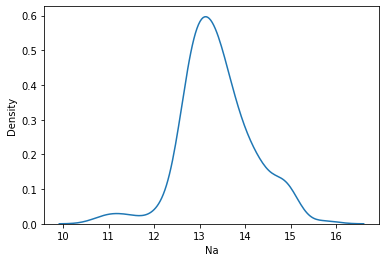

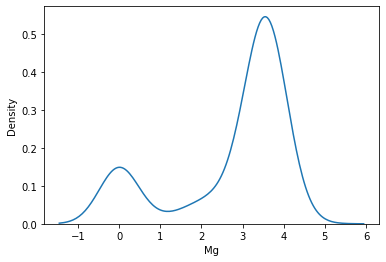

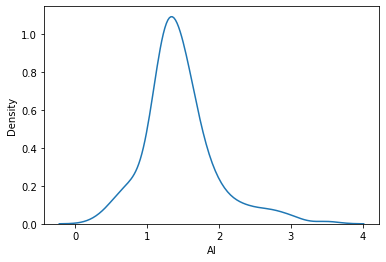

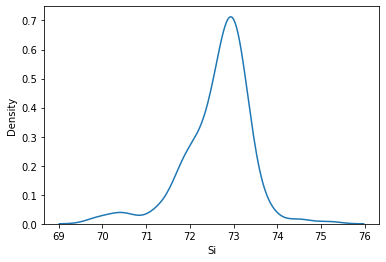

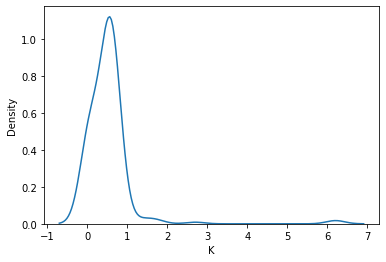

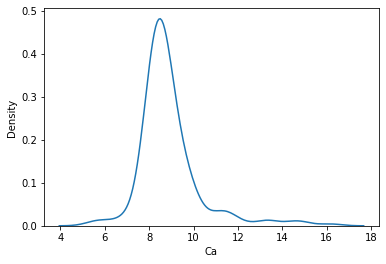

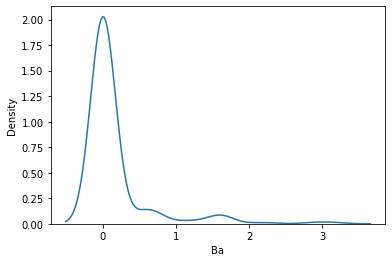

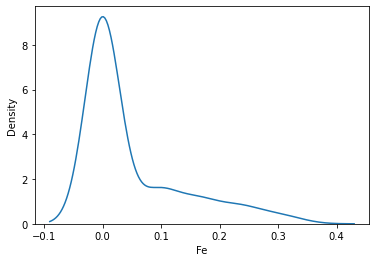

In [ ]:
for i in ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
       sns.kdeplot(train[i])
       plt.show()

In [ ]:
x = train[['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = train['Type of glass']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)


In [ ]:
X_train = train.drop(columns = ['Type of glass']).values
y_train = train['Type of glass'].values

X_test = test.drop(columns = ['Type of glass']).values
y_test = test['Type of glass'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=6)))

K value  :  1  train score :  0.1326530612244898  score :  0.9228219696969697
K value  :  2  train score :  0.14795918367346939  score :  0.9177714646464646
K value  :  3  train score :  0.1326530612244898  score :  0.9278724747474748
K value  :  4  train score :  0.1326530612244898  score :  0.9281881313131314
K value  :  5  train score :  0.1326530612244898  score :  0.9228219696969697
K value  :  6  train score :  0.1326530612244898  score :  0.9281881313131314
K value  :  7  train score :  0.1326530612244898  score :  0.9228219696969697
K value  :  8  train score :  0.1326530612244898  score :  0.9281881313131314
K value  :  9  train score :  0.1326530612244898  score :  0.9381313131313131
K value  :  10  train score :  0.1326530612244898  score :  0.9231376262626263
K value  :  20  train score :  0.1326530612244898  score :  0.8874684343434343


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
euclidean_predict = classifier.predict(X_test_scaled)
ac = accuracy_score(y_test, euclidean_predict)

print("Accuracy Score of KNN with Eucledican Distance: {:.2f} ".format(ac))
from sklearn.metrics import classification_report
print(classification_report(y_test,euclidean_predict,zero_division=1))

Accuracy Score of KNN with Eucledican Distance: 0.67 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.38      1.00      0.55         3
           3       1.00      0.33      0.50         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.67        18
   macro avg       0.85      0.67      0.65        18
weighted avg       0.85      0.67      0.65        18

